![](problem.png)

\section*{a)}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    f=924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
    return f


def binary_search(f,a,b,acc=1e-6):
    err=1
    if f(a)*f(b) <0:
#         print("there is a root between {} and {}".format(a,b))
        while err> acc:      
            mid=(a+b)/2
            if f(mid)*f(a)>0:
                a=mid
            else:
                b=mid
            err=abs(a-b)
        return mid
        
    else:
#         print("ERROR\nchoose other interval\n")
        return None

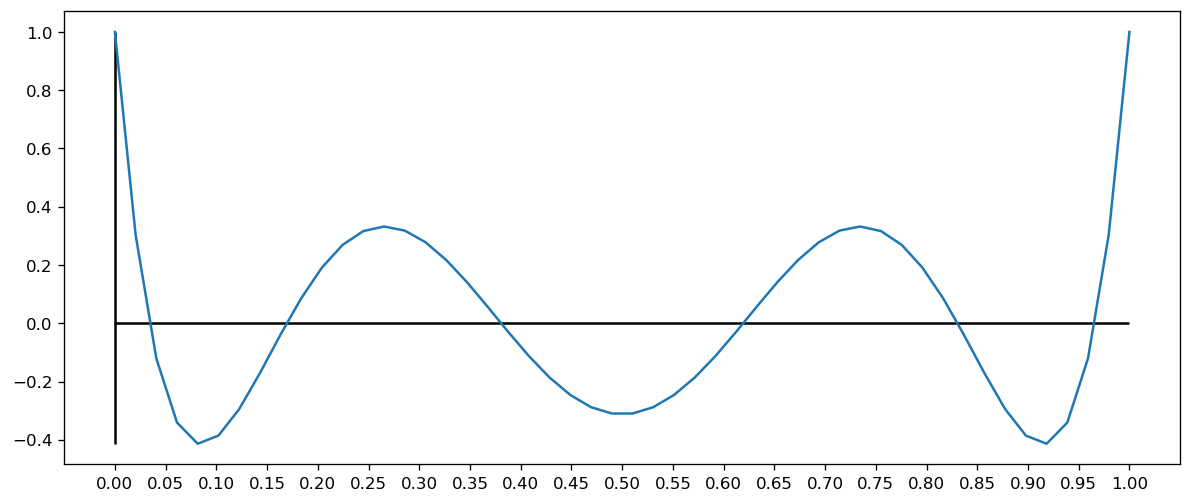

In [3]:
x=np.linspace(0,1)
plt.figure(figsize=(12,5),dpi=120)
plt.plot(x,f(x))
plt.vlines(0,min(f(x)),max(f(x)))
plt.hlines(0,min(x),max(x))
plt.xticks(np.arange(0,1.01,.05))
plt.show()

Un estimado para las raíces a esta curva son los puntos alrededor de $x=[0.03, 0.17, 0.38, 0.63, 0.84, 0.97]$

\section*{b)}

Este método utiliza `np.linspace` para crear una serie de puntos y se buscan raíces entre todos los puntos

In [4]:
def find_roots(f,a,b,num_roots,num=50,acc=1e-12):
    Roots=[]
    X,xstep = np.linspace(a,b,num=num,retstep=True)
    for x in X:
        root= binary_search(f,x,x+xstep,acc)
        if root != None:
            Roots.append(root)
    if len(Roots) < num_roots:
        print("doubling points")
        Roots=find_roots(f,a,b,num_roots=6,num=2*num,acc=acc)
    return Roots

In [5]:
print("Las raíces de la función son:\n{}".format(find_roots(f,a=0,b=1,num_roots=6)))

Las raíces de la función son:
[0.03376524289891751, 0.16939530676713072, 0.3806904069586342, 0.6193095930413657, 0.830604693232869, 0.9662347571010823]


## Método 2
Quise intentar utilizar un método donde se presenta unos puntos como estimados cercanos a las raíces y el algoritmo crea un intérvalo alrededor del mismo

In [6]:
def diff(List):
    diflist=[]
    for i in range(len(List)):
        if i == len(List)-1:
            break
        diflist.append(List[i]-List[i+1])
        
            
    return diflist

In [7]:
def find_roots2(f,a,b,num_roots,Guess,num=50,acc=1e-14):
    Roots=[]
    Xint=[]
    
    diflist=diff(Guess)
    step=min(np.abs(diflist))/num

    for guess in Xguess:
        xint1= guess-step
        xint2= guess+step
        Xint.append((xint1,xint2))

    for x in Xint:

        root= binary_search(f,x[0],x[1],acc)
        if root != None:
            Roots.append(root)
    if len(Roots) < num_roots:
        print("Have only {} roots".format(len(Roots)))
        print("Roots are",Roots)
        print("doubling points\n\n")
        Roots=find_roots2(f,a,b,num_roots,Guess,num=num/2,acc=acc)
    return Roots

In [8]:
Xguess= [0.03, 0.17, 0.38, 0.63, 0.84, 0.97]

In [9]:
print("Las raíces de la función son:\n{}".format(find_roots2(f,a=0,b=1,num_roots=6,Guess=Xguess)))

Have only 2 roots
Roots are [0.1693953067668605, 0.38069040695840306]
doubling points


Have only 4 roots
Roots are [0.03376524289842856, 0.1693953067668605, 0.38069040695840306, 0.9662347571015905]
doubling points


Have only 5 roots
Roots are [0.03376524289842856, 0.1693953067668605, 0.38069040695840306, 0.8306046932331337, 0.9662347571015905]
doubling points


Las raíces de la función son:
[0.03376524289842856, 0.1693953067668605, 0.38069040695840306, 0.619309593041591, 0.8306046932331337, 0.9662347571015905]


## Comparación entre métodos

In [10]:
print("roots1\n",find_roots(f,0,1,num_roots=6,acc=1e-14),"\nroots2\n",find_roots2(f,0,1,6,Xguess,acc=1e-14))

Have only 2 roots
Roots are [0.1693953067668605, 0.38069040695840306]
doubling points


Have only 4 roots
Roots are [0.03376524289842856, 0.1693953067668605, 0.38069040695840306, 0.9662347571015905]
doubling points


Have only 5 roots
Roots are [0.03376524289842856, 0.1693953067668605, 0.38069040695840306, 0.8306046932331337, 0.9662347571015905]
doubling points


roots1
 [0.03376524289842564, 0.1693953067668616, 0.3806904069584022, 0.6193095930415977, 0.8306046932331752, 0.9662347571015741] 
roots2
 [0.03376524289842856, 0.1693953067668605, 0.38069040695840306, 0.619309593041591, 0.8306046932331337, 0.9662347571015905]
